# Lista 6, Jakub Ciągło (275986), Mateusz Ćwiek (276011)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris, load_wine, fetch_lfw_people
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Zadanie 1

Generujemy sztuczny zbiór danych w $\mathbb{R}^3$, w którym punkty leżą w pobliżu pewnej płaszczyzny (czyli faktyczna wymiarowość danych jest bliska $2$).

Następnie stosujemy analizę głównych składowych (PCA) z `scikit-learn`, aby zredukować wymiarowość z $3D$ do $2D$:
- dopasowujemy model `PCA(n_components=2)` do danych $3D$,
- przekształcamy dane do nowej przestrzeni $2D$ (pierwsze dwie składowe główne),
- porównujemy wizualnie dane przed i po redukcji wymiarowości.


Kształt danych 3D: (300, 3)
Kształt danych po PCA (2D): (300, 2)
Wyjaśniona wariancja (składowe): [0.57454077 0.42469013]


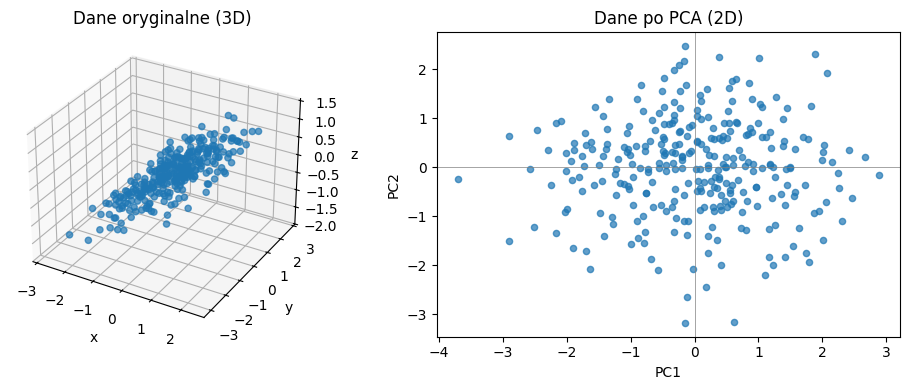

In [28]:
np.random.seed(0)
n_samples = 300

u = np.random.randn(n_samples)
v = np.random.randn(n_samples)

# Definiujemy płaszczyznę w 3D: x = u, y = v, z ≈ 0.5*u + 0.2*v
# + mały szum
x = u
y = v
z = 0.5 * u + 0.2 * v + 0.05 * np.random.randn(n_samples)

X_3d = np.column_stack([x, y, z])

print("Kształt danych 3D:", X_3d.shape)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_3d)

print("Kształt danych po PCA (2D):", X_2d.shape)
print("Wyjaśniona wariancja (składowe):", pca.explained_variance_ratio_)


fig = plt.figure(figsize=(10, 4))

#dane 3D 
ax1 = fig.add_subplot(1, 2, 1, projection="3d")
ax1.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], s=20, alpha=0.7)
ax1.set_title("Dane oryginalne (3D)")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")

#dane 2D
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(X_2d[:, 0], X_2d[:, 1], s=20, alpha=0.7)
ax2.set_title("Dane po PCA (2D)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.axhline(0, color="gray", linewidth=0.5)
ax2.axvline(0, color="gray", linewidth=0.5)

plt.tight_layout()
plt.show()


## Zadanie 2

Korzystamy ze zbioru Iris (4 cechy na próbkę) i stosujemy PCA po standaryzacji danych.

Kroki:
1. Skalujemy cechy.
2. Dopasowujemy `PCA` z `n_components=4`, aby policzyć udział wariancji wyjaśnionej przez każdą składową główną.
3. Rysujemy:
   - wykres udziału wariancji wyjaśnionej przez poszczególne składowe,
   - wykres skumulowanej wariancji.
4. Na podstawie skumulowanej wariancji określamy, ile głównych składowych trzeba zachować, aby wyjaśnić co najmniej \(95\%\) całkowitej wariancji.


Kształt danych: (150, 4)
Udział wariancji wyjaśnionej: [0.72962445 0.22850762 0.03668922 0.00517871]
Skumulowana wariancja: [0.72962445 0.95813207 0.99482129 1.        ]
Liczba składowych potrzebnych do wyjaśnienia >= 95% wariancji: 2


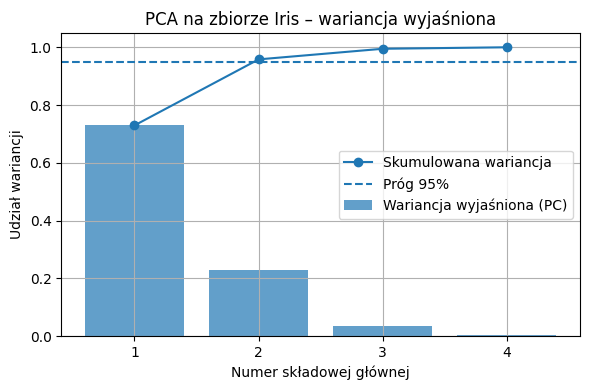

In [29]:
data = load_iris()
X = data.data 
y = data.target

print("Kształt danych:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

expl_var = pca.explained_variance_ratio_          
cum_expl_var = np.cumsum(expl_var)               

print("Udział wariancji wyjaśnionej:", expl_var)
print("Skumulowana wariancja:", cum_expl_var)

threshold = 0.95
n_components_95 = np.argmax(cum_expl_var >= threshold) + 1
print(f"Liczba składowych potrzebnych do wyjaśnienia >= 95% wariancji: {n_components_95}")

components = np.arange(1, len(expl_var) + 1)

plt.figure(figsize=(6, 4))

plt.bar(components, expl_var, alpha=0.7, label="Wariancja wyjaśniona (PC)")

plt.plot(components, cum_expl_var, marker="o", label="Skumulowana wariancja")

plt.axhline(threshold, linestyle="--", label="Próg 95%")
plt.xticks(components)
plt.xlabel("Numer składowej głównej")
plt.ylabel("Udział wariancji")
plt.title("PCA na zbiorze Iris – wariancja wyjaśniona")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Wynika, że 2 pierwsze składowe wystarczają, żeby wyjaśnić ≥ 95% całkowitej wariancji – dlatego mówimy, że dla tego zbioru można sensownie zredukować wymiar z 4D do 2D bez dużej utraty informacji.

## Zadanie 3

Korzystamy ponownie ze zbioru danych Iris, a następnie redukujemy jego wymiarowość do 2 głównych składowych za pomocą PCA.

Kroki:
1. Standaryzacja cech 
2. Dopasowanie PCA z `n_components=2` i przekształcenie danych do przestrzeni $2D$.
3. Wykres punktowy w przestrzeni dwóch pierwszych składowych, z kolorami odpowiadającymi klasom gatunków.

Kształt danych: (150, 4)
Kształt po PCA: (150, 2)
Udział wariancji wyjaśnionej: [0.72962445 0.22850762]
Skumulowana wariancja: [0.72962445 0.95813207]


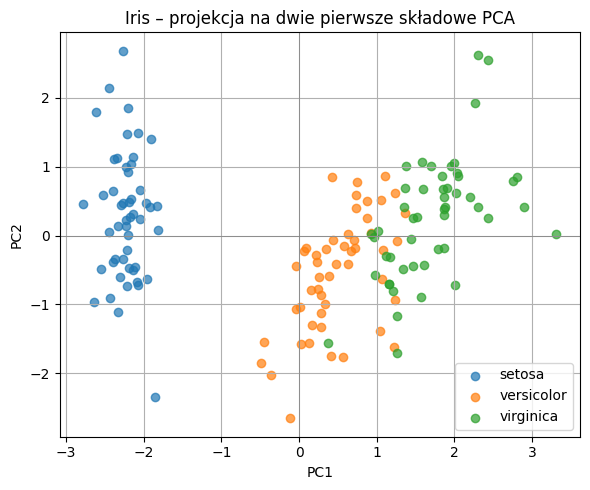

In [30]:
data = load_iris()
X = data.data     
y = data.target    
target_names = data.target_names

print("Kształt danych:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Kształt po PCA:", X_pca.shape)
print("Udział wariancji wyjaśnionej:", pca.explained_variance_ratio_)
print("Skumulowana wariancja:", np.cumsum(pca.explained_variance_ratio_))

plt.figure(figsize=(6, 5))

for class_idx, class_name in enumerate(target_names):
    mask = (y == class_idx)
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=class_name,
        alpha=0.7
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Iris – projekcja na dwie pierwsze składowe PCA")
plt.axhline(0, color="gray", linewidth=0.5)
plt.axvline(0, color="gray", linewidth=0.5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- Dwie pierwsze składowe PCA wyjaśniają ok. $95{,}8\%$ całkowitej wariancji danych, więc rzut do 2D zachowuje prawie całą informację z oryginalnych 4 cech.
- Klasa *setosa* jest w tej przestrzeni bardzo dobrze oddzielona od pozostałych – tworzy wyraźny, osobny klaster.
- Klasy *versicolor* i *virginica* częściowo nachodzą na siebie, ale widać między nimi pewną separację (różne „chmury” punktów).
- PCA jest więc w tym przypadku **skuteczną metodą wizualizacji**: pozwala w 2D zobaczyć strukturę danych i częściowe rozdzielenie klas, choć nie daje idealnej separacji wszystkich trzech gatunków. 


## Zadanie 4

Korzystamy ze zbioru Wine (13 cech chemicznych wina, 3 klasy).  
Porównujemy dwa podejścia:

1. Model bazowy – Regresja Logistyczna trenowana na pełnych danych (13 cech) po standaryzacji.
2. Model z PCA – te same dane najpierw przekształcamy PCA do 2 głównych składowych, a następnie trenujemy tę samą Regresję Logistyczną na danych 2D.

Dla obu wariantów mierzymy:
- dokładność na zbiorze treningowym i testowym,
- czas treningu.

Na tej podstawie oceniamy wpływ redukcji wymiarowości (PCA) na jakość i szybkość uczenia modelu.


In [43]:
data = load_wine()
X = data.data  
y = data.target 

print("Kształt danych:", X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler_full = StandardScaler()
X_train_full = scaler_full.fit_transform(X_train)
X_test_full = scaler_full.transform(X_test)

clf_full = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

t0 = time.time()
clf_full.fit(X_train_full, y_train)
t_full = time.time() - t0

y_train_pred_full = clf_full.predict(X_train_full)
y_test_pred_full = clf_full.predict(X_test_full)

acc_train_full = accuracy_score(y_train, y_train_pred_full)
acc_test_full = accuracy_score(y_test, y_test_pred_full)

print("------ Model bazowy (bez PCA)")
print(f"Czas treningu: {t_full:.4f} s")
print(f"Dokładność train: {acc_train_full:.3f}")
print(f"Dokładność test:  {acc_test_full:.3f}")
print()


# PCA (2 główne składowe)

scaler_pca = StandardScaler()
X_train_scaled = scaler_pca.fit_transform(X_train)
X_test_scaled = scaler_pca.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Udział wariancji wyjaśnionej przez 2 PC:", pca.explained_variance_ratio_)
print("Skumulowana wariancja:", np.cumsum(pca.explained_variance_ratio_))

clf_pca = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

t0 = time.time()
clf_pca.fit(X_train_pca, y_train)
t_pca = time.time() - t0

y_train_pred_pca = clf_pca.predict(X_train_pca)
y_test_pred_pca = clf_pca.predict(X_test_pca)

acc_train_pca = accuracy_score(y_train, y_train_pred_pca)
acc_test_pca = accuracy_score(y_test, y_test_pred_pca)

print("\n------ Model z PCA (2 składowe)")
print(f"Czas treningu: {t_pca:.4f} s")
print(f"Dokładność train: {acc_train_pca:.3f}")
print(f"Dokładność test:  {acc_test_pca:.3f}")


Kształt danych: (178, 13)
------ Model bazowy (bez PCA)
Czas treningu: 0.0034 s
Dokładność train: 1.000
Dokładność test:  0.972

Udział wariancji wyjaśnionej przez 2 PC: [0.35792104 0.19270671]
Skumulowana wariancja: [0.35792104 0.55062776]

------ Model z PCA (2 składowe)
Czas treningu: 0.0023 s
Dokładność train: 0.972
Dokładność test:  0.917


c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


- Model bazowy (bez PCA) osiąga bardzo wysoką jakość: $\text{accuracy}_{\text{train}} = 1.0$, $\text{accuracy}_{\text{test}} \approx 97.2\%$ przy czasie treningu ok. $0.0034\ \text{s}$.
- Po redukcji wymiarowości do 2 składowych PCA model trenuje się minimalnie szybciej (ok. $0.0023\ \text{s}$), ale dokładność spada do $\text{accuracy}_{\text{test}} \approx 91.7\%$.
- Dwie pierwsze składowe PCA wyjaśniają tylko ok. $55\%$ całkowitej wariancji, więc redukcja z 13 do 2 wymiarów usuwa sporą część informacji – stąd wyraźny spadek jakości klasyfikacji.
- W tym przykładzie PCA jako pre-processing **nie poprawia** jakości modelu; daje jedynie niewielkie przyspieszenie kosztem istotnej utraty dokładności.


## Zadanie 5

Korzystamy ze zbioru Wine i porównujemy dwie metody redukcji wymiarowości:

- PCA – metoda nadzorowana? Nie, PCA jest nienadzorowane: szuka kierunków maksymalnej całkowitej wariancji danych, ignorując etykiety klas.
- LDA  – metoda nadzorowana: znajduje takie kierunki, które maksymalizują separację między klasami (maksymalizuje stosunek wariancji międzyklasowej do wewnątrzklasowej).

W zadaniu:
1. Standaryzujemy dane.
2. Redukujemy wymiar do 2D za pomocą PCA i LDA.
3. Rysujemy dwa wykresy punktowe (2D), kolorując punkty według klasy.
4. Porównujemy, która metoda daje lepszą separację klas na płaszczyźnie.


Kształt danych: (178, 13)
PCA - udział wariancji: [0.36198848 0.1920749 ]
PCA - skumulowana wariancja: [0.36198848 0.55406338]


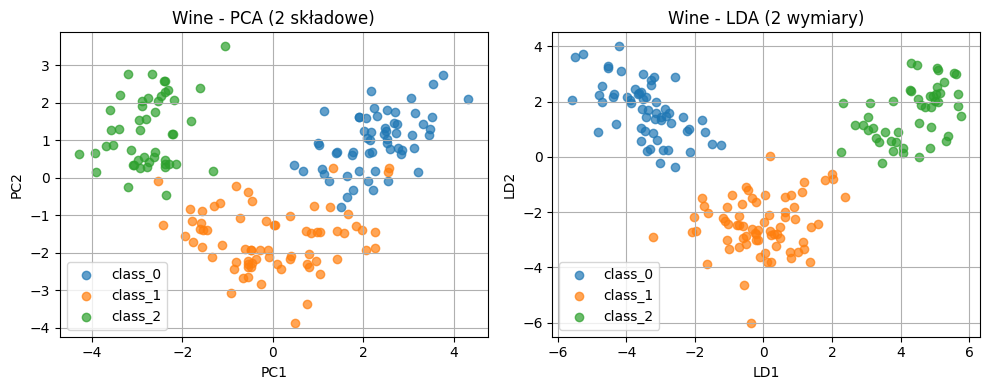

In [32]:
data = load_wine()
X = data.data      
y = data.target    
target_names = data.target_names

print("Kształt danych:", X.shape)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("PCA - udział wariancji:", pca.explained_variance_ratio_)
print("PCA - skumulowana wariancja:", np.cumsum(pca.explained_variance_ratio_))

# LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)


fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# PCA 
for class_idx, class_name in enumerate(target_names):
    mask = (y == class_idx)
    axes[0].scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=class_name,
        alpha=0.7
    )

axes[0].set_title("Wine - PCA (2 składowe)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend()
axes[0].grid(True)

# LDA 
for class_idx, class_name in enumerate(target_names):
    mask = (y == class_idx)
    axes[1].scatter(
        X_lda[mask, 0],
        X_lda[mask, 1],
        label=class_name,
        alpha=0.7
    )

axes[1].set_title("Wine - LDA (2 wymiary)")
axes[1].set_xlabel("LD1")
axes[1].set_ylabel("LD2")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


- Dwie pierwsze składowe PCA wyjaśniają ok. $55\%$ wariancji danych. Na wykresie widać, że klasy częściowo się rozdzielają, ale wciąż występuje zauważalne nakładanie się klastrów (szczególnie klasy 0 i 1).
- Projekcja LDA na dwa wymiary daje znacznie lepszą separację – trzy klasy tworzą wyraźnie odseparowane skupiska z niewielką liczbą punktów „pomiędzy”.
- Różnica wynika z podejścia:
  - PCA jest metodą **nienadzorowaną** – maksymalizuje całkowitą wariancję danych, nie wykorzystuje etykiet klas, więc nie „wie”, które kierunki najlepiej rozdzielają klasy.
  - LDA jest metodą **nadzorowaną** – wybiera kierunki maksymalizujące stosunek wariancji międzyklasowej do wewnątrzklasowej, dzięki czemu optymalnie rozdziela klasy w przestrzeni niskowymiarowej.
- W tym przykładzie LDA okazuje się skuteczniejsza do wizualizacji struktury klas niż PCA.


## Zadanie 6

Korzystamy ze zbioru zdjęć twarzy LFW dostępnego w `scikit-learn`.  
Każdy obraz jest przedstawiony jako wektor o bardzo dużej liczbie wymiarów (liczba pikseli).

Kroki:
1. Wczytanie podzbioru LFW (kilka osób, pomniejszone obrazy).
2. Spłaszczenie obrazów do wektorów i dopasowanie PCA z liczbą składowych $k$ (np. $k = 100$).
3. Redukcja wymiarowości (projekcja na $k$ głównych składowych) i rekonstrukcja obrazów za pomocą `inverse_transform`.
4. Wyświetlenie obok siebie:
   - oryginalnych zdjęć,
   - zrekonstruowanych zdjęć po kompresji PCA.

PCA pełni tu rolę „kompresji liniowej”: zachowujemy tylko te kierunki w przestrzeni pikseli, które odpowiadają największej wariancji (najważniejszym cechom twarzy).

Liczba obrazów: 1560
Liczba pikseli na obraz: 1850
Rozmiar obrazka: (50, 37)
Liczba klas (osób): 12
Kształt po PCA: (1560, 100)
Skumulowana wariancja: [0.24045339 0.36898434 0.43777388 0.49246114 0.53711635 0.56323606
 0.5851074  0.60361814 0.6215852  0.63836193]


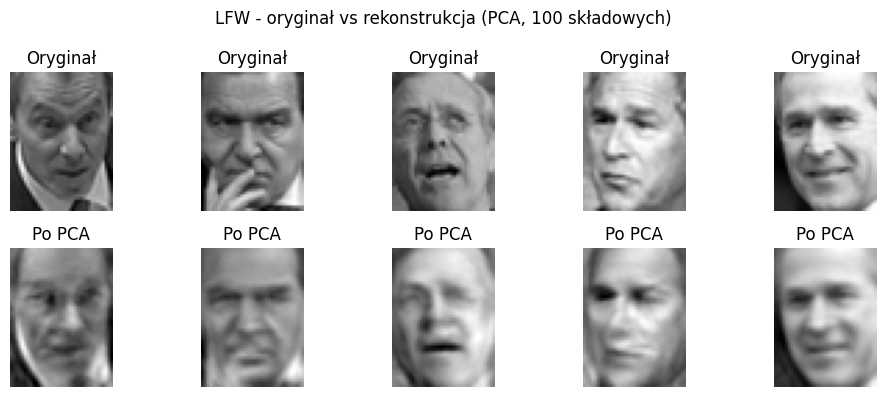

In [33]:
lfw = fetch_lfw_people(
    min_faces_per_person=50,  # wybierz osoby z >= 50 zdjęciami 
    resize=0.4,               # zmniejszamy rozdzielczość
    color=False               # obrazy w odcieniach szarości
)

X = lfw.data          # macierz [n_samples, n_pixels]
y = lfw.target
images = lfw.images   # obrazy 2D
h, w = images.shape[1], images.shape[2]

print("Liczba obrazów:", X.shape[0])
print("Liczba pikseli na obraz:", X.shape[1])
print("Rozmiar obrazka:", (h, w))
print("Liczba klas (osób):", len(lfw.target_names))


n_components = 100 

pca = PCA(
    n_components=n_components,
    svd_solver="randomized",
    whiten=True,
    random_state=42
)

X_pca = pca.fit_transform(X)          # projekcja do przestrzeni k-wymiarowej
X_reconstructed = pca.inverse_transform(X_pca)  # rekonstrukcja do przestrzeni pikseli

print("Kształt po PCA:", X_pca.shape)
print("Skumulowana wariancja:", np.cumsum(pca.explained_variance_ratio_)[:10])


def plot_original_vs_reconstructed(images_orig, images_rec, h, w, n_examples=5):
    plt.figure(figsize=(2 * n_examples, 4))

    for i in range(n_examples):
        # oryginał
        ax = plt.subplot(2, n_examples, i + 1)
        ax.imshow(images_orig[i].reshape((h, w)), cmap="gray")
        ax.set_title("Oryginał")
        ax.axis("off")

        # rekonstrukcja
        ax = plt.subplot(2, n_examples, i + 1 + n_examples)
        ax.imshow(images_rec[i].reshape((h, w)), cmap="gray")
        ax.set_title("Po PCA")
        ax.axis("off")

    plt.suptitle(f"LFW - oryginał vs rekonstrukcja (PCA, {n_components} składowych)")
    plt.tight_layout()
    plt.show()

plot_original_vs_reconstructed(X, X_reconstructed, h, w, n_examples=5)


- Każdy obraz ma 1850 pikseli, a po zastosowaniu PCA redukujemy wymiar do 100 składowych, czyli do ok. $5\%$ pierwotnego wymiaru.
- Skumulowana wariancja dla pierwszych 10 składowych sięga już ok. $64\%$, a przy 100 składowych zachowana jest znaczna część informacji o obrazie.
- Zrekonstruowane twarze są wyraźnie bardziej rozmyte (utrata detali wysokiej częstotliwości), ale kluczowe cechy (kształt twarzy, układ oczu, ust itp.) pozostają rozpoznawalne.
- PCA działa tu jak liniowa kompresja obrazu: usuwa szum i drobne szczegóły, zachowując strukturę twarzy przy dużo mniejszej liczbie wymiarów.